
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


Confusion Matrix:
[[ 63   1]
 [  1 106]]

Precision: 0.9907
Recall: 0.9907
ROC AUC: 0.9981
Average Precision: 0.9988


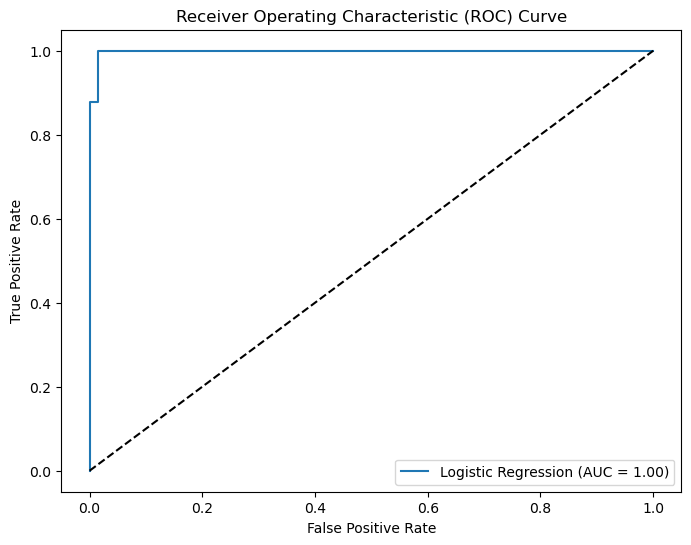

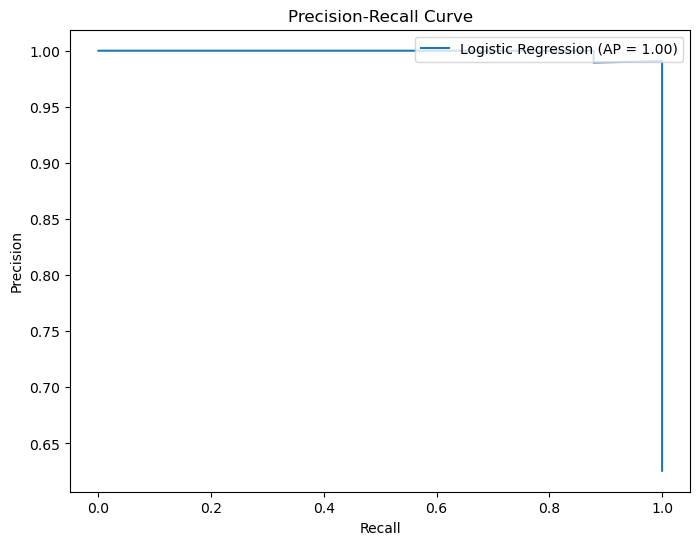


Top 10 Features by Coefficient:
                    Feature  Coefficient
5          mean compactness     0.657340
15        compactness error     0.575199
11            texture error     0.361166
19  fractal dimension error     0.342947
18           symmetry error     0.319289
16          concavity error     0.168790
9    mean fractal dimension     0.029771
25        worst compactness     0.028321
8             mean symmetry    -0.115820
4           mean smoothness    -0.159721

Optimal Threshold: 0.3690

Sigmoid Function Explanation:
The sigmoid function maps real values to probabilities between 0 and 1.
Example: For z=0: σ(0) = 0.5
         For z=1: σ(1) = 0.7310585786300049


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                            precision_score, recall_score,
                            roc_auc_score, roc_curve,
                            precision_recall_curve, average_precision_score)

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
lr_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision: {ap_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f'Logistic Regression (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Feature importance
coefficients = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', ascending=False)
print("\nTop 10 Features by Coefficient:")
print(coefficients.head(10))

# Threshold analysis
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal Threshold: {optimal_threshold:.4f}")

# Sigmoid function explanation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print("\nSigmoid Function Explanation:")
print("The sigmoid function maps real values to probabilities between 0 and 1.")
print("Example: For z=0: σ(0) =", sigmoid(0))
print("         For z=1: σ(1) =", sigmoid(1))
